**1.Importing the libraries**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**2.Loading the dataset**

In [7]:
pdDf = pd.read_csv('Churn_Modelling.csv')
pdDf

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**3.Visualizations**

* **Univariate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f005aed9bd0>]],
      dtype=object)

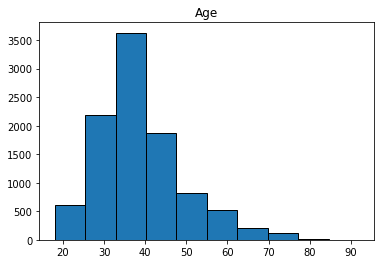

In [ ]:
pdDf.hist(column='Age', grid=False, edgecolor='black')

* **Bivariate Analysis**
   



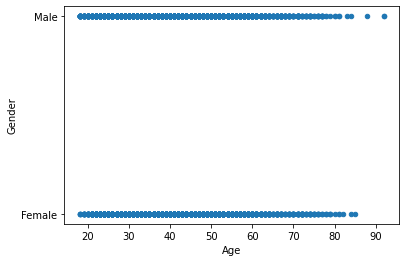

In [ ]:
pdDf.plot(x='Age', y='Gender', kind='scatter')
plt.show()

Text(0, 0.5, 'Exam Score')

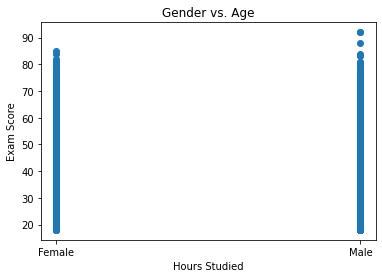

In [ ]:
plt.scatter(pdDf.Gender, pdDf.Age)
plt.title('Gender vs. Age')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

*  **Multivariate Analysis**

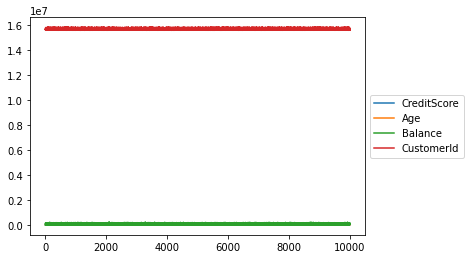

In [ ]:
ax = pdDf[["CreditScore","Age","Balance","CustomerId"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

**4.Perform descriptive statistics on the dataset**

In [9]:
pdDf.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**5. Handle the Missing values.**

In [10]:
pd.isnull(pdDf["Gender"])

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Gender, Length: 10000, dtype: bool

**6. Find the outliers and replace the outliers.**

In [18]:
median=float(pdDf['Age'].median())
pdDf["Age"] = np.where(pdDf["Age"] >75, median,pdDf['Age'])
pdDf["Age"]

0       42.0
1       41.0
2       42.0
3       39.0
4       43.0
        ... 
9995    39.0
9996    35.0
9997    36.0
9998    42.0
9999    28.0
Name: Age, Length: 10000, dtype: float64

**7. Check for Categorical columns and perform encoding.**

In [24]:
pd.get_dummies(pdDf, columns=["Gender", "Age"], prefix=["Age", "Gender"]).head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Gender_66.0,Gender_67.0,Gender_68.0,Gender_69.0,Gender_70.0,Gender_71.0,Gender_72.0,Gender_73.0,Gender_74.0,Gender_75.0
0,1,15634602,Hargrave,619,France,2,0.00,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,Hill,608,Spain,1,83807.86,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,15619304,Onio,502,France,8,159660.80,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,Boni,699,France,1,0.00,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,Mitchell,850,Spain,2,125510.82,1,1,1,...,0,0,0,0,0,0,0,0,0,0


**8. Split the data into dependent and independent variables.**


 **8.1 Split the data into Independent variables.**

In [26]:
# independant
X = pdDf.iloc[:, :-1].values
print(X)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


**8.2 Split the data into Dependent variables.**

In [27]:
# dependant
Y = pdDf.iloc[:, -1].values
print(Y)

[1 0 1 ... 1 1 0]


**9. Scale the independent variables**

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pdDf[["CustomerId"]] = scaler.fit_transform(pdDf[["CustomerId"]])
  
print(pdDf)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender   Age  \
0             1    0.275616   Hargrave          619    France  Female  42.0   
1             2    0.326454       Hill          608     Spain  Female  41.0   
2             3    0.214421       Onio          502    France  Female  42.0   
3             4    0.542636       Boni          699    France  Female  39.0   
4             5    0.688778   Mitchell          850     Spain  Female  43.0   
...         ...         ...        ...          ...       ...     ...   ...   
9995       9996    0.162119   Obijiaku          771    France    Male  39.0   
9996       9997    0.016765  Johnstone          516    France    Male  35.0   
9997       9998    0.075327        Liu          709    France  Female  36.0   
9998       9999    0.466637  Sabbatini          772   Germany    Male  42.0   
9999      10000    0.250483     Walker          792    France  Female  28.0   

      Tenure    Balance  NumOfProducts  HasCrCard  

**10. Split the data into training and testing**

In [30]:
from sklearn.model_selection import train_test_split
train_size=0.8
X = pdDf.drop(columns = ['Tenure']).copy()
y = pdDf['Tenure']
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(8000, 13)
(8000,)
(1000, 13)
(1000,)
(1000, 13)
(1000,)


(None, None)